Discretizacion del problema. k=Nx.Ny
vector columna de nx.ny valores.
matriz de 3x3 (para empezar)

# Tanbién tenemos que ver:
    - funcionalización de la creación de la matriz, ¿Objeto chapa ?
    - cálculo de Flujos
    - escaleo
    - condiciones de contorno de flujo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#discretizar el problema
Nx= 10
Ny= 10
valoresdefault = {'A':75,'B':0,'C':50,'D':100}
#T_A,T_B,T_C,T_D = (75,0,50,100)
contornodefault = {'A':'temp','B':'temp','C':'temp','D':'temp'}

In [3]:
np.array(range(0,Nx*Ny,Nx))

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [4]:
class Chapa:
    
    def __init__(self, Nx = 3,Ny =3):
        self.Nx = Nx
        self.Ny = Ny
        self.Nk = Nx*Ny
        self.beta = Nx/Ny
        self.bordeB = np.linspace(0,self.Nx-1,self.Nx).astype(int)
        self.bordeD = np.linspace(self.Nk-self.Nx,self.Nk-1,self.Nx).astype(int)
        self.bordeA = np.linspace(0,self.Nk-self.Nx,self.Ny).astype(int)
        self.bordeC = np.linspace(self.Nx-1,self.Nk-1,self.Ny).astype(int)
        
        
    def makematrix(self, TC = valoresdefault, tipocontorno = contornodefault):
        """
        LLenar la matriz de la ecuación, respetando las condiciones de contorno.
        
        Nota: Falta llenar las componentes de matriz correspondiente a cc de flujo. Lo hicimos en clase
        pero pedimos que se repita aquí.
        
        INPUTS
        ======
        -tipocontorno: dict  =  tipo de cc en cada borde, ej contornodefault
        - TC: dict = valores de las cc en el borde (temp o flujo segun tipocontorno)
        
        OUTPUT:
        - M: numpy.ndarray  = Matriz del sistema lineal que resuelve la ecuacion de Fourier con cc
        - b: numpy.ndarray = vector de cargas del sistema lineal
        
        
        
        """
        self.TC = TC
        self.tipocontorno = tipocontorno
        Nx = self.Nx
        Ny = self.Ny
        Nk = self.Nk
        beta = self.beta
        M= np.identity(Nx*Ny)
        b= np.zeros((Nx*Ny,1))
        
        for k in range(Nk):
            if k==0:  # En los vértices siempre nos quedamos con el borde que tiene temperatura fija.
                if self.tipocontorno['A']=='temp'  and self.tipocontorno['B'] == 'flujo':
                    b[k] = TC['A']
                elif self.tipocontorno['B']=='temp'  and self.tipocontorno['A'] == 'flujo':
                    b[k] = TC['B']
                else:
                    b[k]= (TC['A']+TC['B'])/2
            elif k==(Nx-1): # En los vértices siempre nos quedamos con el borde que tiene temperatura fija.
                if self.tipocontorno['C']=='temp'  and self.tipocontorno['B'] == 'flujo':
                    b[k] = TC['C']
                elif self.tipocontorno['B']=='temp'  and self.tipocontorno['C'] == 'flujo':
                    b[k] = TC['B']
                else:
                    b[k]= (TC['C']+TC['B'])/2
            elif k== (Nk-Nx):
                b[k]= (TC['A']+TC['D'])/2
            elif k==(Nk-1):
                b[k]= (TC['D']+TC['C'])/2
            elif k in self.bordeB: # k<(Nx-1): 
                b[k]= TC['B']
            elif k in self.bordeD: # k>(Nk-Nx):
                b[k]= TC['D']
            elif  k in self.bordeA: # k%Nx==0:
                b[k]= TC['A']
            elif (k+1)%Nx==0:
                b[k]= TC['C']
            else:
                M[k,k]= -2*(1+ beta**2)
                M[k,k-1]= 1
                M[k,k+1]= 1
                M[k,k-Nx]= beta**2
                M[k,k+Nx]= beta**2
        self.M = M
        self.b = b
        return M, b
    
    def solve(self):
        self.Temp= np.linalg.solve(self.M,b)
        self.Temp_plot= self.Temp.flatten().reshape(self.Nx,self.Ny)
        return self.Temp, self.Temp_plot

In [5]:
C = Chapa(Nx=10, Ny=10)

In [6]:
21 in C.bordeA

False

In [7]:
C.bordeA

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [8]:
C.bordeB

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
C.bordeC

array([ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99])

In [10]:
C.bordeD

array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [11]:
tycc = {'A':'temp', 'B':'flujo', 'C':'temp', 'D':'temp'}

In [12]:
M, b = C.makematrix(tipocontorno=tycc)

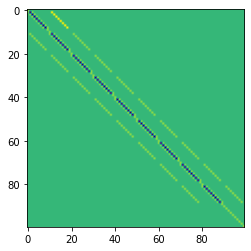

In [13]:
plt.imshow(M)

## Solucion

In [14]:
Temp, Temp_plot = C.solve()

<div style="background:#999900"> para poder hacer el plot correctamente necesitamos indicar a imshow que el origen de coordenadas esta en la esquina izquierda inferior: </div>

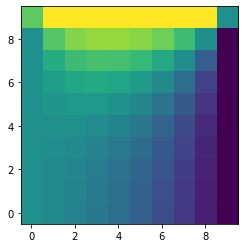

In [15]:
plt.imshow(Temp_plot, origin='lower')

<div style="background:#999900">Otra forma de hacer el gráfico es usando contornos o curvas de nivel. en el siguiente ejemplo usamod dos veces para obtener los niveles sólidos y las curvas de nivel por separado:</div>

<div style="background:#999900">y por favor, agranden los gráficos !</div>

In [16]:
plt.rc('figure', figsize=(15,8))
plt.rc('font', size=22)

Text(0, 0.5, 'j')

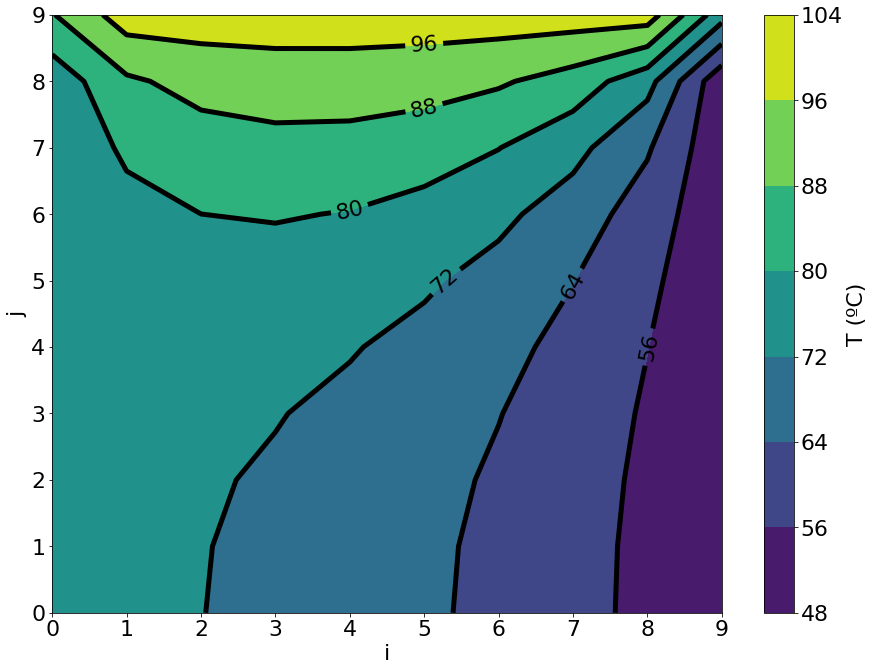

In [17]:
fig, ax = plt.subplots(figsize=(15,11))
mappable = ax.contourf(Temp_plot)
levels = ax.contour(Temp_plot, colors='k', linewidths=5)
cbar = plt.colorbar(mappable)
cbar.set_label('T (ºC)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')